# NOTES

# IMPORTS

In [25]:
import h5py as h5
import numpy as np
from keras import layers
from keras import models
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Fun
import cv2
import imutils
from imutils import paths
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array


# DATASET

## Variables

In [2]:
dataset_dir = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/computervision/HDF5/cat_dog_8k.hdf5'

## Load data

In [3]:
# load hdf5 dataset
dataset = h5.File(dataset_dir, 'r')

# retrieve data
data = np.array(dataset['Features'])
labels = np.array(dataset['Labels'])
label_names = np.array(dataset['label_names'])


## Splitting

In [4]:
split_index = int(len(data) * 0.50)

# train
train_data = data[:split_index]
train_labels = labels[:split_index]

# validation
validation_data = data[split_index:split_index + 2000] 
validation_labels = labels[split_index:split_index + 2000]

# test
test_data = data[split_index + 2000:]
test_labels = labels[split_index + 2000:]

# NETWORK

In [5]:
# Variables
input_shape = (train_data.shape[1],)

# model
model = models.Sequential()
model.add(layers.Dense(512, input_shape = input_shape))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dense(32))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

## Architecture

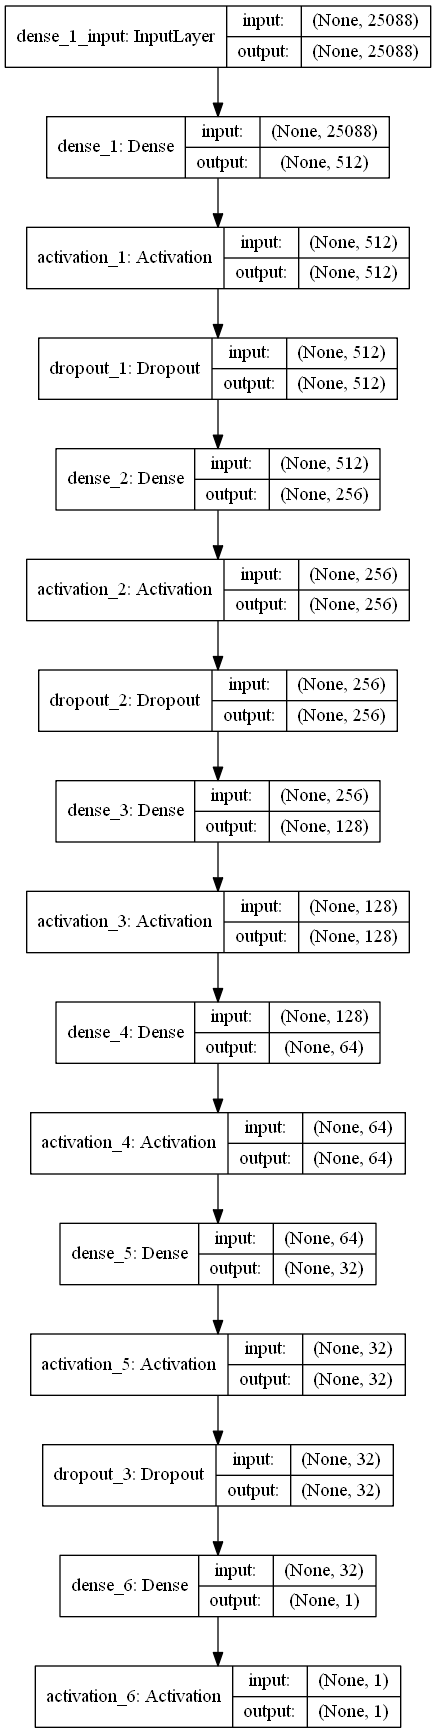

In [6]:
plot_model(model, to_file='serialized/architecture/architecture.png', show_shapes=True)

# COMPILATION

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# TRAINING

In [8]:
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(validation_data, validation_labels))

Train on 4000 samples, validate on 2000 samples
Epoch 1/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.7597 - acc: 0.6545 - val_loss: 0.3913 - val_acc: 0.7935
Epoch 2/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.3356 - acc: 0.8655 - val_loss: 0.2141 - val_acc: 0.9040
Epoch 3/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.2486 - acc: 0.9085 - val_loss: 0.2156 - val_acc: 0.9165
Epoch 4/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.2088 - acc: 0.9308 - val_loss: 0.2638 - val_acc: 0.9245
Epoch 5/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1595 - acc: 0.9423 - val_loss: 0.3472 - val_acc: 0.9275
Epoch 6/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1589 - acc: 0.9505 - val_loss: 0.2408 - val_acc: 0.9295
Epoch 7/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1390 - acc: 0.9595 - val_loss: 0.3089 - val_acc: 0.9255
Epoch 

Epoch 61/100
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0057 - acc: 0.9983 - val_loss: 3.3870 - val_acc: 0.9185
Epoch 62/100
4000/4000 [==============================] - 13s 3ms/step - loss: 0.0155 - acc: 0.9980 - val_loss: 4.3574 - val_acc: 0.9250
Epoch 63/100
4000/4000 [==============================] - 8s 2ms/step - loss: 0.0081 - acc: 0.9985 - val_loss: 4.9698 - val_acc: 0.9220
Epoch 64/100
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0102 - acc: 0.9977 - val_loss: 5.4107 - val_acc: 0.9240
Epoch 65/100
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0369 - acc: 0.9962 - val_loss: 2.6289 - val_acc: 0.9215
Epoch 66/100
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0055 - acc: 0.9970 - val_loss: 4.7233 - val_acc: 0.9230
Epoch 67/100
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0052 - acc: 0.9985 - val_loss: 4.9972 - val_acc: 0.9240
Epoch 68/100
4000/4000 [==================

# PLOTTING

In [9]:
history_dict = history.history

epochs = np.arange(1, len(history_dict['acc']) + 1)

acc = history_dict['acc']
val_acc = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']


## Accuracy

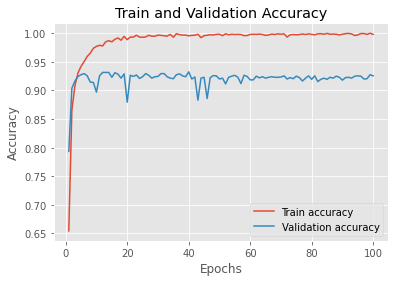

In [10]:
plt.style.use('ggplot')
plt.plot(epochs, acc, label='Train accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss

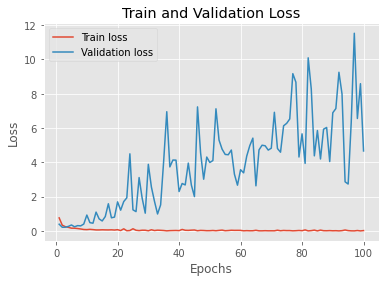

In [11]:
plt.clf()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATION

In [12]:
result = model.evaluate(test_data, test_labels)
result

2000/2000 [==============================] - 1s 413us/step


[4.443217438098517, 0.9204999804496765]

# PREDICTION

In [16]:
preds = []
pred_set = test_data[:10]
predictions = model.predict(pred_set)

for item in predictions:
    if item > 0.5:
        item = 1
    else:
        item = 0
    preds.append(item)
predictions

array([[1.12141985e-04],
       [0.00000000e+00],
       [3.16793987e-12],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.95516364e-17],
       [0.00000000e+00]], dtype=float32)

In [17]:
preds

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

# Fun

In [23]:
class Preprocessor:
    # constructor
    def __init__(self, width, height, inter=cv2.INTER_AREA, dataFormat=None):
        self.width = width
        self.height = height
        self.inter = inter
        self.dataFormat = dataFormat
        
    
    # path getter
    def get_images_path(self, images_dir):
        path =list(paths.list_images(images_dir)) 
        return path
    
    
    # images loader
    def load_images_labels(self, images_path):
        images_data = list()
        labels = list()
        
        # start a progress bar
#         prog_load = progressbar.ProgressBar(maxval=len(images_path), widgets=loading_widgets).start()
        
        # load, preprocess images and extract labels
        for (i, path) in enumerate(images_path):
            single_image = list()
            image = cv2.imread(path)
            image = self.resize(image)
            image = self.img2array(image)
            images_data.append(image)

        # convert images list to numpy array
        images_data = np.array(images_data).astype('float') / 255
        
        return images_data
    
    # resize image
    def resize(self, image):
        # grab (height,width) and initialize deltas
        (h, w) = image.shape[:2]
        dH = 0
        dW = 0
        
        # resize
        if w < h:
            image = imutils.resize(image, width=self.width, inter=self.inter)
            dH = int((image.shape[0] - self.height) / 2.0)
        else:
            image = imutils.resize(image, height=self.height, inter=self.inter)
            dW = int((image.shape[1] - self.width) / 2.0)
        
        # Cropping
        (h, w) = image.shape[:2]
        image = image[dH:h - dH, dW:w - dW]
        
        #resize back to a given spatial dimension
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)
    
    #convert image to array
    def img2array(self, image):
        return img_to_array(image, data_format=self.dataFormat)

In [24]:
pred_dir = 'C:/Users/Tajr/Desktop/Junky/test1/test1/'
preprocessor = Preprocessor(width=224, height=224)

images_path = preprocessor.get_images_path(pred_dir)

pred_images = preprocessor.load_images_labels(images_path)
pred_images.shape

(40, 224, 224, 3)

In [26]:
vgg = VGG16(weights='imagenet', include_top=False)
pred_features = vgg.predict(pred_images)
pred_features.shape

(40, 7, 7, 512)

In [27]:
pred_features = pred_features.reshape(len(pred_features), 512 * 7 * 7)
pred_features.shape

(40, 25088)

In [31]:
preds2 = []
pred_set2 = pred_features
predictions2 = model.predict(pred_set2)

for item2 in predictions2:
    if item2 > 0.5:
        item2 = 1
    else:
        item2 = 0
    preds2.append(item2)
predictions2

array([[1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [9.9448341e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.8443365e-01],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.3836551e-19],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [32]:
preds2

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [33]:
for (i, image_path) in enumerate(images_path):
    image = cv2.imread(image_path)
    
    cv2.putText(image, 'Label: {}'.format(label_names[preds2[i]]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.imshow('Image', image)
    cv2.waitKey(0)

# OBSERVATION

Model accuracy with standard rmsprop optimizer ====>
Model accuracy with time based learning rate scheduler ====> 
Model accuracy with step decay learning rate scheduler ====> 
